In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dimod
import dwave_networkx as dnx

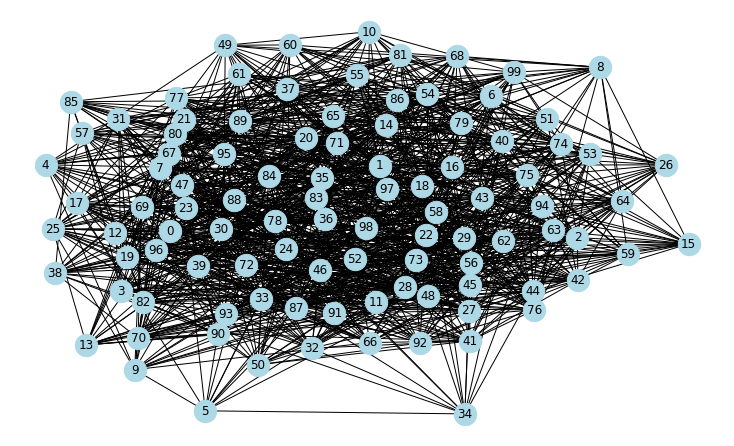

In [3]:
nodes = 2
seed = np.random.randint(1,10)
probability = 10
G = nx.erdos_renyi_graph(100, 0.25, seed=1)

plt.figure(figsize=(10,6))

nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [4]:
for edge in G.edges:
    G[edge[0]][edge[1]]['length'] = edge[0] + edge[1]

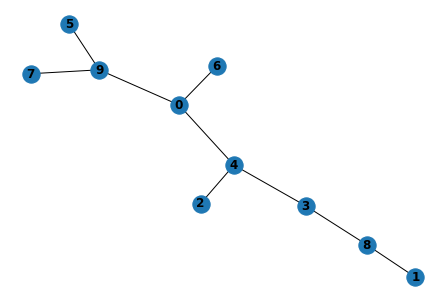

In [5]:
T = nx.random_tree(10, seed=30)
nx.draw(T, with_labels=True, font_weight='bold')

In [6]:
for edge in T.edges:
    T[edge[0]][edge[1]]['length'] = edge[0] + edge[1]

# complete graph & minimum spanning tree

In [7]:
kn = nx.complete_graph(G)

for edge in kn.edges:
#     weight_set.add((edge[0], edge[1], nx.dijkstra_path_length(T, edge[0], edge[1], weight='length')))
    kn[edge[0]][edge[1]]['length'] = nx.dijkstra_path_length(G, edge[0], edge[1], weight='length')

min_spanning_tree = nx.minimum_spanning_tree(kn, weight='length')

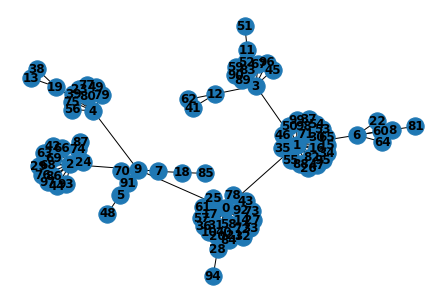

In [8]:
nx.draw(min_spanning_tree, with_labels=True, font_weight='bold')

# minimum cost perfect matching of nodes with odd-degree

In [9]:
odd_degree_nodes = [node for (node, degree) in min_spanning_tree.degree if degree % 2 == 1]
odd_degree_nodes

[1,
 2,
 3,
 6,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [10]:
nodes_to_remove = list(set(kn.nodes)-set(odd_degree_nodes))
nodes_to_remove

[0, 4, 5, 7, 8, 11, 18, 28]

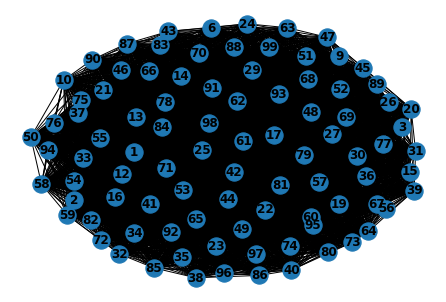

In [11]:
kn_negative = kn.copy()
kn_negative.remove_nodes_from(nodes_to_remove)
nx.draw(kn_negative, with_labels=True, font_weight='bold')

In [12]:
# invert weights
for edge in kn_negative.edges:
    kn_negative[edge[0]][edge[1]]['length'] *= -1

In [13]:
min_cost_perfect_matching = nx.algorithms.matching.max_weight_matching(kn_negative, maxcardinality=True, weight='length')
min_cost_perfect_matching

{(1, 30),
 (3, 12),
 (9, 10),
 (16, 21),
 (17, 14),
 (19, 13),
 (20, 6),
 (24, 15),
 (25, 29),
 (26, 22),
 (27, 23),
 (32, 39),
 (33, 31),
 (34, 38),
 (35, 36),
 (40, 37),
 (41, 44),
 (42, 46),
 (43, 45),
 (48, 50),
 (49, 47),
 (51, 52),
 (56, 55),
 (57, 53),
 (58, 59),
 (60, 54),
 (61, 62),
 (64, 63),
 (66, 78),
 (67, 68),
 (70, 71),
 (72, 84),
 (73, 92),
 (75, 76),
 (80, 74),
 (81, 79),
 (82, 87),
 (85, 86),
 (88, 83),
 (89, 65),
 (90, 94),
 (91, 77),
 (93, 95),
 (96, 98),
 (97, 2),
 (99, 69)}

In [29]:
random_matching = nx.algorithms.maximal_matching(kn_negative)
random_matching

{(1, 2),
 (3, 6),
 (9, 10),
 (12, 13),
 (14, 15),
 (16, 17),
 (19, 20),
 (21, 22),
 (23, 24),
 (25, 26),
 (27, 29),
 (30, 31),
 (32, 33),
 (34, 35),
 (36, 37),
 (38, 39),
 (40, 41),
 (42, 43),
 (44, 45),
 (46, 47),
 (48, 49),
 (50, 51),
 (52, 53),
 (54, 55),
 (56, 57),
 (58, 59),
 (60, 61),
 (62, 63),
 (64, 65),
 (66, 67),
 (68, 69),
 (70, 71),
 (72, 73),
 (74, 75),
 (76, 77),
 (78, 79),
 (80, 81),
 (82, 83),
 (84, 85),
 (86, 87),
 (88, 89),
 (90, 91),
 (92, 93),
 (94, 95),
 (96, 97),
 (98, 99)}

In [15]:
s = 0
for edge in min_cost_perfect_matching:
    s += kn_negative[edge[0]][edge[1]]['length']
s

-4869

In [30]:
s = 0
for edge in random_matching:
    s += kn_negative[edge[0]][edge[1]]['length']
s

-5443

# graph reconstruction

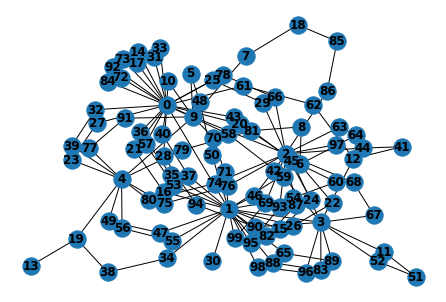

In [16]:
min_spanning_tree_2 = min_spanning_tree.copy()
for edge in min_cost_perfect_matching:
    if not min_spanning_tree.has_edge(edge[0], edge[1]):
        min_spanning_tree.add_edge(edge[0], edge[1], length = kn[edge[0]][edge[1]]['length'])
        min_spanning_tree_2.add_edge(edge[0], edge[1], length = kn[edge[0]][edge[1]]['length'])
    else:
        min_spanning_tree_2.remove_edge(edge[0], edge[1])
        
nx.draw(min_spanning_tree, with_labels=True, font_weight='bold')

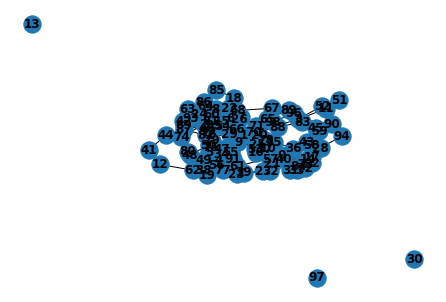

In [17]:
nx.draw(min_spanning_tree_2, with_labels=True, font_weight='bold')

In [18]:
min_spanning_tree_recon = set(min_spanning_tree.to_directed().edges) - set(min_spanning_tree_2.edges)
min_spanning_tree_recon

{(1, 0),
 (1, 30),
 (2, 97),
 (3, 1),
 (3, 12),
 (6, 1),
 (8, 6),
 (9, 0),
 (9, 2),
 (9, 4),
 (9, 5),
 (9, 7),
 (10, 0),
 (10, 9),
 (11, 3),
 (12, 3),
 (13, 19),
 (14, 0),
 (15, 1),
 (16, 1),
 (17, 0),
 (17, 14),
 (18, 7),
 (19, 4),
 (19, 13),
 (20, 0),
 (20, 6),
 (21, 0),
 (21, 16),
 (22, 6),
 (23, 4),
 (24, 2),
 (24, 15),
 (25, 0),
 (26, 1),
 (26, 22),
 (27, 0),
 (27, 23),
 (28, 0),
 (29, 2),
 (29, 25),
 (30, 1),
 (31, 0),
 (32, 0),
 (33, 0),
 (33, 31),
 (34, 1),
 (35, 1),
 (36, 0),
 (36, 35),
 (37, 1),
 (38, 19),
 (38, 34),
 (39, 4),
 (39, 32),
 (40, 0),
 (40, 37),
 (41, 12),
 (42, 2),
 (43, 0),
 (44, 2),
 (44, 41),
 (45, 3),
 (45, 43),
 (46, 1),
 (46, 42),
 (47, 1),
 (48, 5),
 (49, 4),
 (49, 47),
 (50, 1),
 (50, 48),
 (51, 11),
 (52, 3),
 (52, 51),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 4),
 (56, 55),
 (57, 0),
 (57, 53),
 (58, 0),
 (59, 3),
 (59, 58),
 (60, 6),
 (60, 54),
 (61, 0),
 (62, 12),
 (62, 61),
 (63, 2),
 (64, 6),
 (64, 63),
 (65, 1),
 (66, 2),
 (67, 3),
 (68, 2),
 (68, 67),

# Eulerian walk

In [19]:
# degree of each node in the reconstructed minimum spanning tree
nodes = np.array(np.array(list(min_spanning_tree_recon)).flatten())

unique, counts = np.unique(nodes, return_counts=True)
node_degree = dict(zip(unique, counts))

node_degree

{0: 24,
 1: 24,
 2: 16,
 3: 12,
 4: 10,
 5: 2,
 6: 6,
 7: 2,
 8: 2,
 9: 8,
 10: 2,
 11: 2,
 12: 4,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 4,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 2,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 94: 2,
 95: 2,
 96: 2,
 97: 2,
 98: 2,
 99: 2}

In [20]:
edge_df = pd.DataFrame(min_spanning_tree_recon, columns=[-1, 1])
edge_df.insert(2, 'visited', False)
edge_df

,-1,1,visited
0,46,42,False
1,19,4,False
2,15,1,False
3,39,4,False
4,93,2,False
...,...,...,...
140,94,28,False
141,28,0,False
142,9,5,False
143,33,0,False


In [21]:
edge_df = pd.DataFrame(min_spanning_tree_recon, columns=[-1, 1])
edge_df.insert(2, 'visited', False)

def DFS(start_node, df):
    forward_visitation = []
    next_node = np.nan
    current_node = start_node
    forward_visitation.append(start_node)
    while next_node != start_node:
        
        candidate_edges = df[((df[-1] == current_node) | (df[1] == current_node)) & (df['visited'] == False)].index
        selected_edge = np.random.choice(candidate_edges)
        df.loc[selected_edge, 'visited'] = True

        if df.loc[selected_edge, -1] == current_node:
            next_node = df.loc[selected_edge, 1]
        else:
            next_node = df.loc[selected_edge, -1]

        current_node = next_node
        
        forward_visitation.append(current_node)
        
    return(forward_visitation)

DFS(7, edge_df)

[7,
 18,
 85,
 86,
 2,
 87,
 82,
 1,
 53,
 57,
 0,
 72,
 84,
 0,
 61,
 62,
 12,
 3,
 89,
 65,
 1,
 54,
 60,
 6,
 8,
 81,
 79,
 4,
 9,
 0,
 17,
 14,
 0,
 27,
 23,
 4,
 49,
 47,
 1,
 98,
 96,
 3,
 83,
 88,
 1,
 34,
 38,
 19,
 13,
 19,
 4,
 39,
 32,
 0,
 25,
 29,
 2,
 63,
 64,
 6,
 1,
 30,
 1,
 16,
 21,
 0,
 1,
 35,
 36,
 0,
 33,
 31,
 0,
 58,
 59,
 3,
 45,
 43,
 0,
 28,
 94,
 90,
 3,
 52,
 51,
 11,
 3,
 1,
 71,
 70,
 9,
 5,
 48,
 50,
 1,
 46,
 42,
 2,
 69,
 99,
 1,
 15,
 24,
 2,
 9,
 91,
 77,
 4,
 56,
 55,
 1,
 26,
 22,
 6,
 20,
 0,
 10,
 9,
 7]

In [ ]:
edge_df

In [ ]:
def Eulerian_walk(graph_set, source):
    
    df = pd.DataFrame(min_spanning_tree_recon, columns=[-1, 1])
    df.insert(2, 'visited', False)

    subloops = []

    while False in df['visited'].values:
        subloops.append(DFS(np.random.choice(df.loc[df['visited']== False, -1].values), df))
    
    return(subloops)

sub_lps = Eulerian_walk(min_spanning_tree_recon, 1)
sub_lps

In [22]:
edge_df = pd.DataFrame(min_spanning_tree_recon, columns=[-1, 1])
edge_df.insert(2, 'visited', False)

subloops = []

while False in edge_df['visited'].values:
    subloops.append(DFS(np.random.choice(edge_df.loc[edge_df['visited']== False, -1].values), edge_df))

subloops

[[69,
  2,
  42,
  46,
  1,
  30,
  1,
  6,
  64,
  63,
  2,
  24,
  15,
  1,
  54,
  60,
  6,
  22,
  26,
  1,
  82,
  87,
  2,
  66,
  78,
  0,
  32,
  39,
  4,
  9,
  5,
  48,
  50,
  1,
  95,
  93,
  2,
  29,
  25,
  0,
  84,
  72,
  0,
  40,
  37,
  1,
  3,
  90,
  94,
  28,
  0,
  33,
  31,
  0,
  57,
  53,
  1,
  55,
  56,
  4,
  49,
  47,
  1,
  99,
  69],
 [9, 70, 71, 1, 65, 89, 3, 12, 41, 44, 2, 86, 85, 18, 7, 9],
 [98,
  1,
  0,
  14,
  17,
  0,
  92,
  73,
  0,
  43,
  45,
  3,
  83,
  88,
  1,
  34,
  38,
  19,
  13,
  19,
  4,
  23,
  27,
  0,
  10,
  9,
  2,
  74,
  80,
  4,
  79,
  81,
  8,
  6,
  20,
  0,
  9,
  91,
  77,
  4,
  75,
  76,
  2,
  97,
  2,
  68,
  67,
  3,
  96,
  98],
 [16, 21, 0, 61, 62, 12, 3, 59, 58, 0, 36, 35, 1, 16],
 [52, 51, 11, 3, 52]]

In [23]:
if len(subloops) > 1:
    base_loop = np.array(subloops[0])
    for i in range(1, len(subloops)):
        temp_loop = np.array(subloops[i])
        common_node = set(base_loop).intersection(set(temp_loop))
        pos_baseloop = np.where(np.array(base_loop) == list(common_node)[0])[0]
        pos_temploop = np.where(np.array(temp_loop) == list(common_node)[0])[0]
        # modify nodes position of temp loop
        temp_loop_mod = np.concatenate((temp_loop[pos_temploop[0]:], temp_loop[1:pos_temploop[0]]))
        # connect subloop
        base_loop = np.insert(base_loop, pos_baseloop[0], temp_loop_mod)
base_loop

array([69,  2, 42, 46,  1, 65, 89,  3, 52, 51, 11,  3, 12, 41, 44,  2, 86,
       85, 18,  7,  9, 70, 71,  1, 30,  1,  6, 64, 63,  2, 24, 15,  1, 54,
       60,  6, 22, 26,  1, 82, 87,  2, 66, 78,  0, 61, 62, 12,  3, 59, 58,
        0, 36, 35,  1, 16, 21,  0, 14, 17,  0, 92, 73,  0, 43, 45,  3, 83,
       88,  1, 34, 38, 19, 13, 19,  4, 23, 27,  0, 10,  9,  2, 74, 80,  4,
       79, 81,  8,  6, 20,  0,  9, 91, 77,  4, 75, 76,  2, 97,  2, 68, 67,
        3, 96, 98,  1,  0, 32, 39,  4,  9,  5, 48, 50,  1, 95, 93,  2, 29,
       25,  0, 84, 72,  0, 40, 37,  1,  3, 90, 94, 28,  0, 33, 31,  0, 57,
       53,  1, 55, 56,  4, 49, 47,  1, 99, 69], dtype=int64)

# triangle inequality based local optimization

In [26]:
node_degree

{0: 24,
 1: 24,
 2: 16,
 3: 12,
 4: 10,
 5: 2,
 6: 6,
 7: 2,
 8: 2,
 9: 8,
 10: 2,
 11: 2,
 12: 4,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 4,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 2,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 94: 2,
 95: 2,
 96: 2,
 97: 2,
 98: 2,
 99: 2}

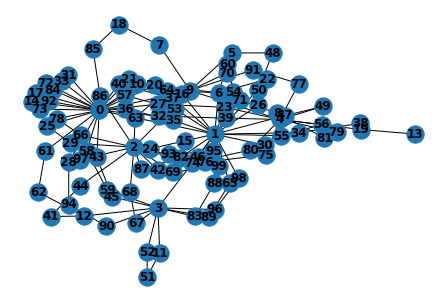

In [27]:
nx.draw(min_spanning_tree, with_labels=True, font_weight='bold')